In [1]:
import os
import numpy as np
from scipy import stats, integrate
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
%matplotlib inline
sns.set(color_codes=True)

In [3]:
# Load pheno file
path_root = '/home/yassinebha/Drive/HCP/'
data = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))
data.head()

,Subject,Age_in_Yrs,Twin_Stat,Zygosity,Mother_ID,Father_ID,Race,Ethnicity,Handedness,SSAGA_Employ,...,NEORAW_60,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,24,NotTwin,NotTwin,52259,82122.0,White,Not Hispanic/Latino,95,2.0,...,A,5.2,101.12,86.45,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,27,NotTwin,NotTwin,56037,85858.0,White,Not Hispanic/Latino,65,2.0,...,N,NaN,108.79,97.19,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,27,Twin,NotMZ,51488,81352.0,White,Not Hispanic/Latino,95,2.0,...,A,3.6,101.12,86.45,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,33,Twin,MZ,51730,81594.0,White,Not Hispanic/Latino,55,2.0,...,A,2.0,108.79,98.04,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,27,Twin,NotMZ,52813,82634.0,White,Not Hispanic/Latino,85,2.0,...,A,2.0,122.25,110.45,38.6,84.84,85.31,1.92,1.0,1.88


In [4]:
behav_list = ['PicSeq_Unadj','CardSort_Unadj','Flanker_Unadj','PMAT24_A_CR','PMAT24_A_SI','PMAT24_A_RTCR','ReadEng_Unadj','PicVocab_Unadj','ProcSpeed_Unadj','DDisc_SV_1mo_200','DDisc_SV_6mo_200','DDisc_SV_1yr_200','DDisc_SV_3yr_200','DDisc_SV_5yr_200','DDisc_SV_10yr_200','DDisc_SV_1mo_40K','DDisc_SV_6mo_40K','DDisc_SV_1yr_40K','DDisc_SV_3yr_40K','DDisc_SV_5yr_40K','DDisc_SV_10yr_40K','DDisc_AUC_200','DDisc_AUC_40K','VSPLOT_TC','VSPLOT_CRTE','VSPLOT_OFF','SCPT_TP','SCPT_TN','SCPT_FP','SCPT_FN','SCPT_TPRT','SCPT_SEN','SCPT_SPEC','SCPT_LRNR','IWRD_TOT','IWRD_RTC','ListSort_Unadj','ListSort_AgeAdj','ER40_CR','ER40_CRT','ER40ANG','ER40FEAR','ER40HAP','ER40NOE','ER40SAD','AngAffect_Unadj','AngHostil_Unadj','AngAggr_Unadj','FearAffect_Unadj','FearSomat_Unadj','Sadness_Unadj','LifeSatisf_Unadj','MeanPurp_Unadj','PosAffect_Unadj','Friendship_Unadj','Loneliness_Unadj','PercHostil_Unadj','PercReject_Unadj','EmotSupp_Unadj','InstruSupp_Unadj','PercStress_Unadj','SelfEff_Unadj','Emotion_Task_Acc','Emotion_Task_Median_RT','Emotion_Task_Face_Acc','Emotion_Task_Face_Median_RT','Emotion_Task_Shape_Acc','Emotion_Task_Shape_Median_RT','Gambling_Task_Perc_Larger','Gambling_Task_Perc_Smaller','Gambling_Task_Perc_NLR','Gambling_Task_Median_RT_Larger','Gambling_Task_Median_RT_Smaller','Gambling_Task_Reward_Perc_Larger','Gambling_Task_Reward_Median_RT_Larger','Gambling_Task_Reward_Perc_Smaller','Gambling_Task_Reward_Median_RT_Smaller','Gambling_Task_Reward_Perc_NLR','Gambling_Task_Punish_Perc_Larger','Gambling_Task_Punish_Median_RT_Larger','Gambling_Task_Punish_Perc_Smaller','Gambling_Task_Punish_Median_RT_Smaller','Gambling_Task_Punish_Perc_NLR','Language_Task_Acc','Language_Task_Median_RT','Language_Task_Story_Acc','Language_Task_Story_Median_RT','Language_Task_Story_Avg_Difficulty_Level','Language_Task_Math_Acc','Language_Task_Math_Median_RT','Language_Task_Math_Avg_Difficulty_Level','Relational_Task_Acc','Relational_Task_Median_RT','Relational_Task_Match_Acc','Relational_Task_Match_Median_RT','Relational_Task_Rel_Acc','Relational_Task_Rel_Median_RT','Social_Task_Perc_Random','Social_Task_Perc_TOM','Social_Task_Perc_Unsure','Social_Task_Perc_NLR','Social_Task_Median_RT_Random','Social_Task_Median_RT_TOM','Social_Task_Median_RT_Unsure','Social_Task_Random_Perc_Random','Social_Task_Random_Median_RT_Random','Social_Task_Random_Perc_TOM','Social_Task_Random_Median_RT_TOM','Social_Task_Random_Perc_Unsure','Social_Task_Random_Median_RT_Unsure','Social_Task_Random_Perc_NLR','Social_Task_TOM_Perc_Random','Social_Task_TOM_Median_RT_Random','Social_Task_TOM_Perc_TOM','Social_Task_TOM_Median_RT_TOM','Social_Task_TOM_Perc_Unsure','Social_Task_TOM_Median_RT_Unsure','Social_Task_TOM_Perc_NLR','WM_Task_Acc','WM_Task_Median_RT','WM_Task_2bk_Acc','WM_Task_2bk_Median_RT','WM_Task_0bk_Acc','WM_Task_0bk_Median_RT','WM_Task_0bk_Body_Acc','WM_Task_0bk_Body_Acc_Target','WM_Task_0bk_Body_Acc_Nontarget','WM_Task_0bk_Face_Acc','WM_Task_0bk_Face_Acc_Target','WM_Task_0bk_Face_ACC_Nontarget','WM_Task_0bk_Place_Acc','WM_Task_0bk_Place_Acc_Target','WM_Task_0bk_Place_Acc_Nontarget','WM_Task_0bk_Tool_Acc','WM_Task_0bk_Tool_Acc_Target','WM_Task_0bk_Tool_Acc_Nontarget','WM_Task_2bk_Body_Acc','WM_Task_2bk_Body_Acc_Target','WM_Task_2bk_Body_Acc_Nontarget','WM_Task_2bk_Face_Acc','WM_Task_2bk_Face_Acc_Target','WM_Task_2bk_Face_Acc_Nontarget','WM_Task_2bk_Place_Acc','WM_Task_2bk_Place_Acc_Target','WM_Task_2bk_Place_Acc_Nontarget','WM_Task_2bk_Tool_Acc','WM_Task_2bk_Tool_Acc_Target','WM_Task_2bk_Tool_Acc_Nontarget','WM_Task_0bk_Body_Median_RT','WM_Task_0bk_Body_Median_RT_Target','WM_Task_0bk_Body_Median_RT_Nontarget','WM_Task_0bk_Face_Median_RT','WM_Task_0bk_Face_Median_RT_Target','WM_Task_0bk_Face_Median_RT_Nontarget','WM_Task_0bk_Place_Median_RT','WM_Task_0bk_Place_Median_RT_Target','WM_Task_0bk_Place_Median_RT_Nontarget','WM_Task_0bk_Tool_Median_RT','WM_Task_0bk_Tool_Median_RT_Target','WM_Task_0bk_Tool_Median_RT_Nontarget','WM_Task_2bk_Body_Median_RT','WM_Task_2bk_Body_Median_RT_Target','WM_Task_2bk_Body_Median_RT_Nontarget','WM_Task_2bk_Face_Median_RT','WM_Task_2bk_Face_Median_RT_Target','WM_Task_2bk_Face_Median_RT_Nontarget','WM_Task_2bk_Place_Median_RT','WM_Task_2bk_Place_Median_RT_Target','WM_Task_2bk_Place_Median_RT_Nontarget','WM_Task_2bk_Tool_Median_RT','WM_Task_2bk_Tool_Median_RT_Target','WM_Task_2bk_Tool_Median_RT_Nontarget','Endurance_Unadj','Endurance_AgeAdj','GaitSpeed_Comp','Dexterity_Unadj','Dexterity_AgeAdj','Strength_Unadj','Strength_AgeAdj','NEOFAC_A','NEOFAC_O','NEOFAC_C','NEOFAC_N','NEOFAC_E','NEORAW_01','NEORAW_02','NEORAW_03','NEORAW_04','NEORAW_05','NEORAW_06','NEORAW_07','NEORAW_08','NEORAW_09','NEORAW_10','NEORAW_11','NEORAW_12','NEORAW_13','NEORAW_14','NEORAW_15','NEORAW_16','NEORAW_17','NEORAW_18','NEORAW_19','NEORAW_20','NEORAW_21','NEORAW_22','NEORAW_23','NEORAW_24','NEORAW_25','NEORAW_26','NEORAW_27','NEORAW_28','NEORAW_29','NEORAW_30','NEORAW_31','NEORAW_32','NEORAW_33','NEORAW_34','NEORAW_35','NEORAW_36','NEORAW_37','NEORAW_38','NEORAW_39','NEORAW_40','NEORAW_41','NEORAW_42','NEORAW_43','NEORAW_44','NEORAW_45','NEORAW_46','NEORAW_47','NEORAW_48','NEORAW_49','NEORAW_50','NEORAW_51','NEORAW_52','NEORAW_53','NEORAW_54','NEORAW_55','NEORAW_56','NEORAW_57','NEORAW_58','NEORAW_59','NEORAW_60','Noise_Comp','Odor_Unadj','Odor_AgeAdj','PainInterf_Tscore','Taste_Unadj','Taste_AgeAdj','Mars_Log_Score','Mars_Errs','Mars_Final']

'PicSeq_Unadj',
'CardSort_Unadj','Flanker_Unadj','PMAT24_A_CR','PMAT24_A_SI','PMAT24_A_RTCR','ReadEng_Unadj','PicVocab_Unadj','ProcSpeed_Unadj','DDisc_SV_1mo_200','DDisc_SV_6mo_200','DDisc_SV_1yr_200','DDisc_SV_3yr_200','DDisc_SV_5yr_200','DDisc_SV_10yr_200','DDisc_SV_1mo_40K','DDisc_SV_6mo_40K','DDisc_SV_1yr_40K','DDisc_SV_3yr_40K','DDisc_SV_5yr_40K','DDisc_SV_10yr_40K','DDisc_AUC_200','DDisc_AUC_40K','VSPLOT_TC','VSPLOT_CRTE','VSPLOT_OFF','SCPT_TP','SCPT_TN','SCPT_FP','SCPT_FN','SCPT_TPRT','SCPT_SEN','SCPT_SPEC','SCPT_LRNR','IWRD_TOT','IWRD_RTC','ListSort_Unadj','ListSort_AgeAdj','ER40_CR','ER40_CRT','ER40ANG','ER40FEAR','ER40HAP','ER40NOE','ER40SAD','AngAffect_Unadj','AngHostil_Unadj','AngAggr_Unadj','FearAffect_Unadj','FearSomat_Unadj','Sadness_Unadj','LifeSatisf_Unadj','MeanPurp_Unadj','PosAffect_Unadj','Friendship_Unadj','Loneliness_Unadj','PercHostil_Unadj','PercReject_Unadj','EmotSupp_Unadj','InstruSupp_Unadj','PercStress_Unadj','SelfEff_Unadj','Emotion_Task_Acc','Emotion_Task_Median_RT','Emotion_Task_Face_Acc','Emotion_Task_Face_Median_RT','Emotion_Task_Shape_Acc','Emotion_Task_Shape_Median_RT','Gambling_Task_Perc_Larger','Gambling_Task_Perc_Smaller','Gambling_Task_Perc_NLR','Gambling_Task_Median_RT_Larger','Gambling_Task_Median_RT_Smaller','Gambling_Task_Reward_Perc_Larger','Gambling_Task_Reward_Median_RT_Larger','Gambling_Task_Reward_Perc_Smaller','Gambling_Task_Reward_Median_RT_Smaller','Gambling_Task_Reward_Perc_NLR','Gambling_Task_Punish_Perc_Larger','Gambling_Task_Punish_Median_RT_Larger','Gambling_Task_Punish_Perc_Smaller','Gambling_Task_Punish_Median_RT_Smaller','Gambling_Task_Punish_Perc_NLR','Language_Task_Acc','Language_Task_Median_RT','Language_Task_Story_Acc','Language_Task_Story_Median_RT','Language_Task_Story_Avg_Difficulty_Level','Language_Task_Math_Acc','Language_Task_Math_Median_RT','Language_Task_Math_Avg_Difficulty_Level','Relational_Task_Acc','Relational_Task_Median_RT','Relational_Task_Match_Acc','Relational_Task_Match_Median_RT','Relational_Task_Rel_Acc','Relational_Task_Rel_Median_RT','Social_Task_Perc_Random','Social_Task_Perc_TOM','Social_Task_Perc_Unsure','Social_Task_Perc_NLR','Social_Task_Median_RT_Random','Social_Task_Median_RT_TOM','Social_Task_Median_RT_Unsure','Social_Task_Random_Perc_Random','Social_Task_Random_Median_RT_Random','Social_Task_Random_Perc_TOM','Social_Task_Random_Median_RT_TOM','Social_Task_Random_Perc_Unsure','Social_Task_Random_Median_RT_Unsure','Social_Task_Random_Perc_NLR','Social_Task_TOM_Perc_Random','Social_Task_TOM_Median_RT_Random','Social_Task_TOM_Perc_TOM','Social_Task_TOM_Median_RT_TOM','Social_Task_TOM_Perc_Unsure','Social_Task_TOM_Median_RT_Unsure','Social_Task_TOM_Perc_NLR','WM_Task_Acc','WM_Task_Median_RT','WM_Task_2bk_Acc','WM_Task_2bk_Median_RT','WM_Task_0bk_Acc','WM_Task_0bk_Median_RT','WM_Task_0bk_Body_Acc','WM_Task_0bk_Body_Acc_Target','WM_Task_0bk_Body_Acc_Nontarget','WM_Task_0bk_Face_Acc','WM_Task_0bk_Face_Acc_Target','WM_Task_0bk_Face_ACC_Nontarget','WM_Task_0bk_Place_Acc','WM_Task_0bk_Place_Acc_Target','WM_Task_0bk_Place_Acc_Nontarget','WM_Task_0bk_Tool_Acc','WM_Task_0bk_Tool_Acc_Target','WM_Task_0bk_Tool_Acc_Nontarget','WM_Task_2bk_Body_Acc','WM_Task_2bk_Body_Acc_Target','WM_Task_2bk_Body_Acc_Nontarget','WM_Task_2bk_Face_Acc','WM_Task_2bk_Face_Acc_Target','WM_Task_2bk_Face_Acc_Nontarget','WM_Task_2bk_Place_Acc','WM_Task_2bk_Place_Acc_Target','WM_Task_2bk_Place_Acc_Nontarget','WM_Task_2bk_Tool_Acc','WM_Task_2bk_Tool_Acc_Target','WM_Task_2bk_Tool_Acc_Nontarget','WM_Task_0bk_Body_Median_RT','WM_Task_0bk_Body_Median_RT_Target','WM_Task_0bk_Body_Median_RT_Nontarget','WM_Task_0bk_Face_Median_RT','WM_Task_0bk_Face_Median_RT_Target','WM_Task_0bk_Face_Median_RT_Nontarget','WM_Task_0bk_Place_Median_RT','WM_Task_0bk_Place_Median_RT_Target','WM_Task_0bk_Place_Median_RT_Nontarget','WM_Task_0bk_Tool_Median_RT','WM_Task_0bk_Tool_Median_RT_Target','WM_Task_0bk_Tool_Median_RT_Nontarget','WM_Task_2bk_Body_Median_RT','WM_Task_2bk_Body_Median_RT_Target','WM_Task_2bk_Body_Median_RT_Nontarget','WM_Task_2bk_Face_Median_RT','WM_Task_2bk_Face_Median_RT_Target','WM_Task_2bk_Face_Median_RT_Nontarget','WM_Task_2bk_Place_Median_RT','WM_Task_2bk_Place_Median_RT_Target','WM_Task_2bk_Place_Median_RT_Nontarget','WM_Task_2bk_Tool_Median_RT','WM_Task_2bk_Tool_Median_RT_Target','WM_Task_2bk_Tool_Median_RT_Nontarget','Endurance_Unadj','Endurance_AgeAdj','GaitSpeed_Comp','Dexterity_Unadj','Dexterity_AgeAdj','Strength_Unadj','Strength_AgeAdj','NEOFAC_A','NEOFAC_O','NEOFAC_C','NEOFAC_N','NEOFAC_E','NEORAW_01','NEORAW_02','NEORAW_03','NEORAW_04','NEORAW_05','NEORAW_06','NEORAW_07','NEORAW_08','NEORAW_09','NEORAW_10','NEORAW_11','NEORAW_12','NEORAW_13','NEORAW_14','NEORAW_15','NEORAW_16','NEORAW_17','NEORAW_18','NEORAW_19','NEORAW_20','NEORAW_21','NEORAW_22','NEORAW_23','NEORAW_24','NEORAW_25','NEORAW_26','NEORAW_27','NEORAW_28','NEORAW_29','NEORAW_30','NEORAW_31','NEORAW_32','NEORAW_33','NEORAW_34','NEORAW_35','NEORAW_36','NEORAW_37','NEORAW_38','NEORAW_39','NEORAW_40','NEORAW_41','NEORAW_42','NEORAW_43','NEORAW_44','NEORAW_45','NEORAW_46','NEORAW_47','NEORAW_48','NEORAW_49','NEORAW_50','NEORAW_51','NEORAW_52','NEORAW_53','NEORAW_54','NEORAW_55','NEORAW_56','NEORAW_57','NEORAW_58','NEORAW_59','NEORAW_60','Noise_Comp','Odor_Unadj','Odor_AgeAdj','PainInterf_Tscore','Taste_Unadj','Taste_AgeAdj','Mars_Log_Score','Mars_Errs','Mars_Final'

In [5]:
data_subset = data.get(behav_list)

In [ ]:
plot_dist = scatter_matrix(data_subset, alpha=0.2, figsize=(20, 20), diagonal='kde')

KeyboardInterrupt: 

In [6]:
# Compute the correlation matrix
corr = data_subset.corr()

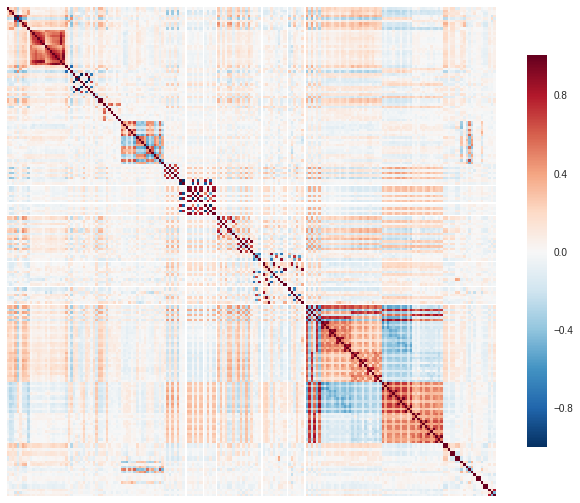

In [11]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,vmax=0.99,
            square=True,
            cbar_kws={"shrink": .8},xticklabels=False,yticklabels=False, ax=ax)

#### The most correlated pheno

A high correlation between FD and BMI

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


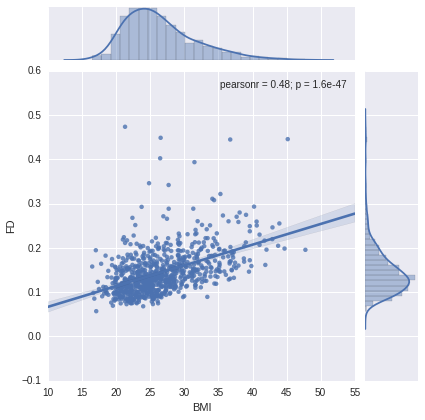

In [20]:
sns.jointplot(x="BMI", y="FD", data=data_subset,kind="reg");

Also hight correlation between ReadEng_Unadj and PicVocab_Unadj

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


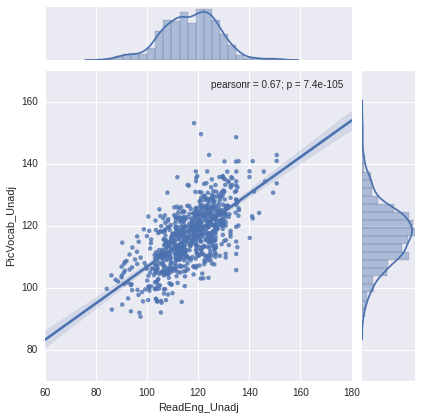

In [22]:
sns.set(color_codes=True)
sns.jointplot(x="ReadEng_Unadj", y="PicVocab_Unadj", data=data_subset,kind='reg');

Working memory score is also correlated with the language tasks 

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


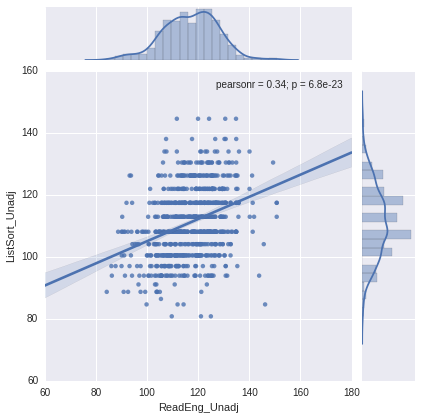

In [23]:
sns.set(color_codes=True)
sns.jointplot(x="ReadEng_Unadj", y="ListSort_Unadj", data=data_subset,kind='reg');

#### Gender differences

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: ReadEng_Unadj, dtype: object

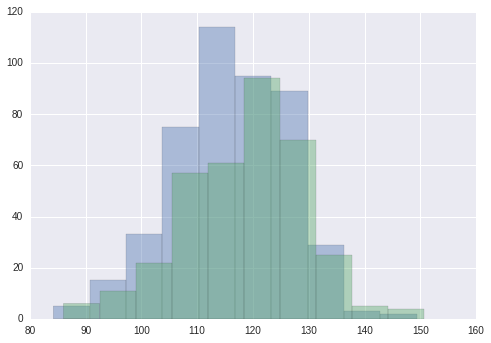

In [24]:
# Gender diference - Strength
data.groupby('Gender').ReadEng_Unadj.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: ListSort_Unadj, dtype: object

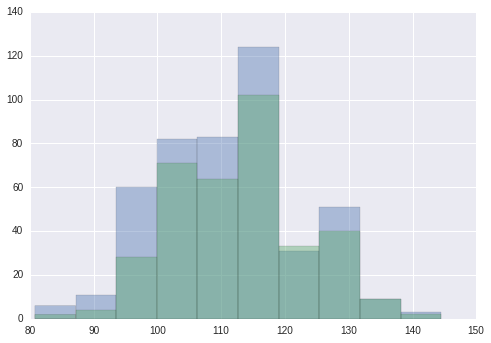

In [25]:
# Gender diference - Dexterity
data.groupby('Gender').ListSort_Unadj.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: PicVocab_Unadj, dtype: object

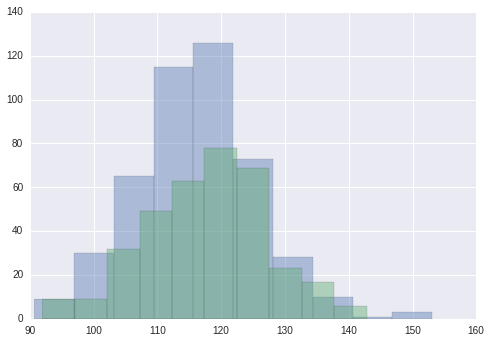

In [26]:
# Gender diference - PainInterf_Tscore
data.groupby('Gender').PicVocab_Unadj.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: BMI, dtype: object

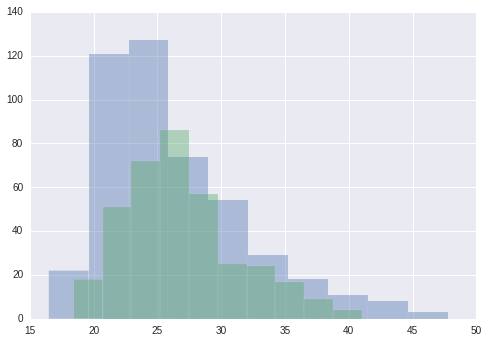

In [122]:
# Gender diference - BMI
data.groupby('Gender').BMI.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: FD, dtype: object

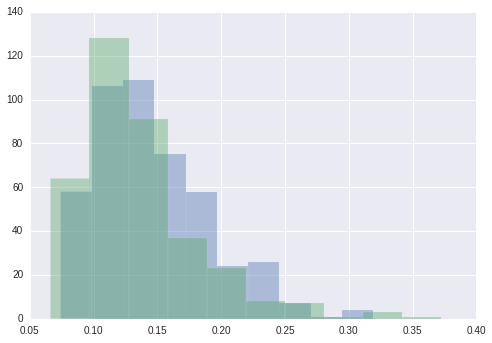

In [123]:
# Gender diference - FD
data.groupby('Gender').FD.hist(alpha=0.4)